## Fashion Recommender EDA
This notebook explores some of the data in the Fashion Dataset and includes some basic functions for accessing the data.

In [1]:
# Python imports
import cv2
import os
import json
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

from imatmrcnn import imaterialist as imat

%matplotlib inline
random.seed(5)

Using TensorFlow backend.


In [2]:
# !pip install ipywidgets 
# !jupyter nbextension enable --py widgetsnbextension
# !jupyter labextension install @jupyter-widgets/jupyterlab-manager

#%%capture
#from tqdm.notebook import tqdm
#tqdm().pandas()

In [3]:
# Dataset directory
DATASET_DIR = os.path.join(ROOT_DIR, "data/")
assert os.path.exists(DATASET_DIR), "Dataset directory not found, did you forget to create a symlink?"

# List all files and folders in top-level dataset directory
for file in os.listdir(DATASET_DIR):
    print(file)

train
label_descriptions.json
test
train.csv
sample_submission.csv


#### Folders '`train`' and '`test`' should be in this listing as well as the files:

- `label_descriptions.json` <br>
- `train.csv` <br>
- `sample_submissions.csv` <br>

## Support Functions

In [4]:
def print_dict(dictionary, name_dict):
    """
    EDA function to display the categories and attributes
    """
    print("{}{}{}{}{}".format("rank".ljust(5), "id".center(8), "name".center(40), "amount".rjust(10), "ratio(%)".rjust(10)))
    all_num = sum(dictionary.values())
    for i, (key, val) in enumerate(sorted(dictionary.items(), key=lambda x: -x[1])):
        print("{:<5}{:^8}{:^40}{:>10}{:>10.3%}".format(i+1, key, name_dict[key], val, val/all_num))
        

In [5]:
def cv2plt(img, isColor=True):
    original_img = img
    original_img = original_img.transpose(1, 2, 0)
    original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    return original_img

## END Support Functions

### Explore Label_Descriptions
Label descriptions join catgory and attribute id values to their descrriptions.

**`Category`** - Clothing type (shirt, jacket, pants,...) <br>
**`Attribute`** - Characteristics (fit, fabric, details,...)

In [6]:
dataset = imat.IMaterialistDataset(DATASET_DIR)
labels = dataset.get_labels_dict()
display(labels.keys())

dict_keys(['attributes', 'categories', 'info'])

In [7]:
labels_info = dataset.get_labels_info()
display(labels_info)

{'contributor': 'iMaterialist Fashion Competition group',
 'date_created': '2019-04-19 12:38:27.493919',
 'description': 'The 2019 FGVC^6 iMaterialist Competition - Fashion track dataset.',
 'url': 'https://github.com/visipedia/imat_comp',
 'version': '1.0',
 'year': 2019}

In [8]:
df_categories = dataset.get_categories_info()
display(df_categories)
print("Categories Count: {}".format(len(df_categories)))

,id,level,name,supercategory
0,0,2,"shirt, blouse",upperbody
1,1,2,"top, t-shirt, sweatshirt",upperbody
2,2,2,sweater,upperbody
3,3,2,cardigan,upperbody
4,4,2,jacket,upperbody
5,5,2,vest,upperbody
6,6,2,pants,lowerbody
7,7,2,shorts,lowerbody
8,8,2,skirt,lowerbody
9,9,2,coat,wholebody


Categories Count: 46


In [9]:
df_attributes = dataset.get_attributes_info()
display(df_attributes)
print("Attributes Count: {}".format(len(df_attributes)))

,id,level,name,supercategory
0,0,1,above-the-hip (length),length
1,1,1,hip (length),length
2,2,1,micro (length),length
3,3,1,mini (length),length
4,4,1,above-the-knee (length),length
5,5,1,knee (length),length
6,6,1,below the knee (length),length
7,7,1,midi,length
8,8,1,maxi (length),length
9,9,1,floor (length),length


Attributes Count: 92


### Explore Train CSV

Train CSV file contains listing of images in training set:

**`ImageId`** - filename of the image <br>
**`EncodedPixels`** - space separated integers in pairs of 'pixel loc' 'run'.  Identifies mask.  **run-length encoded format**<br>
**`Height`** - Image height <br>
**`Width`** - Image width <br>
**`ClassId`** - Cateogry/ies of items masked in image. _ delimited.  First item is 'category'.  Subsequent items are attributes.

In [10]:
# Get training data info 
df_traininfo = dataset.get_train_info()

In [11]:
n_training_data = len(df_traininfo)
print("Num Training Info Data: {}".format(n_training_data))

Num Training Info Data: 333415


In [12]:
index = random.randint(0, int(n_training_data / 2))
df_traininfo.iloc[index :  index + 10]

,ImageId,EncodedPixels,Height,Width,ClassId
163289,7d523882f294d2ac57d74d82a170e65e.jpg,151035 20 151784 21 152532 24 153280 26 154029...,750,500,1
163290,7d523882f294d2ac57d74d82a170e65e.jpg,225976 3 226727 7 227478 11 228228 16 228249 4...,750,500,31
163291,7d523882f294d2ac57d74d82a170e65e.jpg,133787 1 134534 5 135282 8 136029 12 136777 15...,750,500,31
163292,7d523882f294d2ac57d74d82a170e65e.jpg,101725 4 102472 12 103219 18 103965 22 104712 ...,750,500,8
163293,7d523882f294d2ac57d74d82a170e65e.jpg,109177 10 109924 20 110671 20 111418 21 112167...,750,500,9
163294,7d523882f294d2ac57d74d82a170e65e.jpg,166459 5 167208 11 167957 12 168706 14 169455 ...,750,500,23
163295,7d523882f294d2ac57d74d82a170e65e.jpg,107789 5 108538 6 109287 7 110036 8 110785 9 1...,750,500,24
163296,7d523882f294d2ac57d74d82a170e65e.jpg,151842 2 152589 6 153337 9 154086 10 154834 13...,750,500,34
163297,7d523882f294d2ac57d74d82a170e65e.jpg,147339 1 148088 3 148837 5 149586 6 150335 8 1...,750,500,19
163298,7d523882f294d2ac57d74d82a170e65e.jpg,174998 1 175747 3 176497 3 177248 3 177999 3 1...,750,500,33


In [13]:
ridx = random.randint(0, n_training_data)
# User Support Funtion to parse ClassId
encoded_class_id = df_traininfo.iloc[ridx].ClassId
classid, attrids = dataset.classid2label(encoded_class_id)

# display results
print ("Encoded ClassID_Atrribute: {}".format(encoded_class_id))
print("ClassID: {}:{}".format(classid, dataset.classid2str(int(classid))))
print("Attributes:")
for a in attrids:
      print("\t{}:{}".format(a, dataset.attrid2str(int(a)) ) )

Encoded ClassID_Atrribute: 6
ClassID: 6:pants
Attributes:


### Analyze Categories

In [14]:
counter_category = Counter()
counter_attribute = Counter()
for class_id in df_traininfo["ClassId"]:
    category, attributes = dataset.classid2label(class_id)
    counter_category.update([category])
    counter_attribute.update(attributes)

In [15]:
category_name_dict = dict(zip(df_categories.id.astype("str"), df_categories.name))
attribute_name_dict = dict(zip(df_attributes.id.astype("str"), df_attributes.name))

In [16]:
print("Category label frequency")
print_dict(counter_category, category_name_dict)

Category label frequency
rank    id                     name                      amount  ratio(%)
1       31                    sleeve                      59452   17.831%
2       23                     shoe                       46374   13.909%
3       33                   neckline                     34260   10.275%
4       32                    pocket                      27179    8.152%
5       10                    dress                       18739    5.620%
6       1            top, t-shirt, sweatshirt             16550    4.964%
7       6                     pants                       12415    3.724%
8       28                    collar                      10160    3.047%
9       35                    zipper                       7994    2.398%
10      4                     jacket                       7833    2.349%
11      24                 bag, wallet                     7217    2.165%
12      19                     belt                        6851    2.055%
13      0    

In [17]:
print("Attributes label frequency")
print_dict(counter_attribute, attribute_name_dict)

Attributes label frequency
rank    id                     name                      amount  ratio(%)
1       20                 symmetrical                    10773   15.018%
2       61               plain (pattern)                   8719   12.155%
3       60      no special manufacturing technique         6396    8.917%
4       41                regular (fit)                    3676    5.125%
5       88                 normal waist                    3569    4.975%
6       91                 no waistline                    2989    4.167%
7       14                    zip-up                       2872    4.004%
8       0             above-the-hip (length)               2716    3.786%
9       40                 tight (fit)                     2224    3.100%
10      3                 mini (length)                    1951    2.720%
11      87                  high waist                     1740    2.426%
12      15                fly (opening)                    1650    2.300%
13      33 

### Review Images

In [18]:
print("The number of training image is {}.".format( dataset.get_num_training_images() ) )
print("The number of test image is {}.".format( dataset.get_num_val_images() ) )

The number of training image is 45625.
The number of test image is 3200.


Category: neckline
Category: sleeve
Category: top, t-shirt, sweatshirt


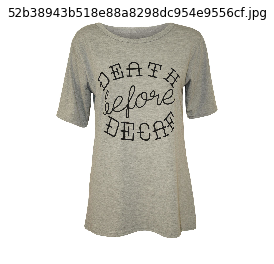

In [19]:
img_name = df_traininfo.sample().ImageId.values[0]
fig, ax = plt.subplots()
dataset.print_img(img_name, ax)

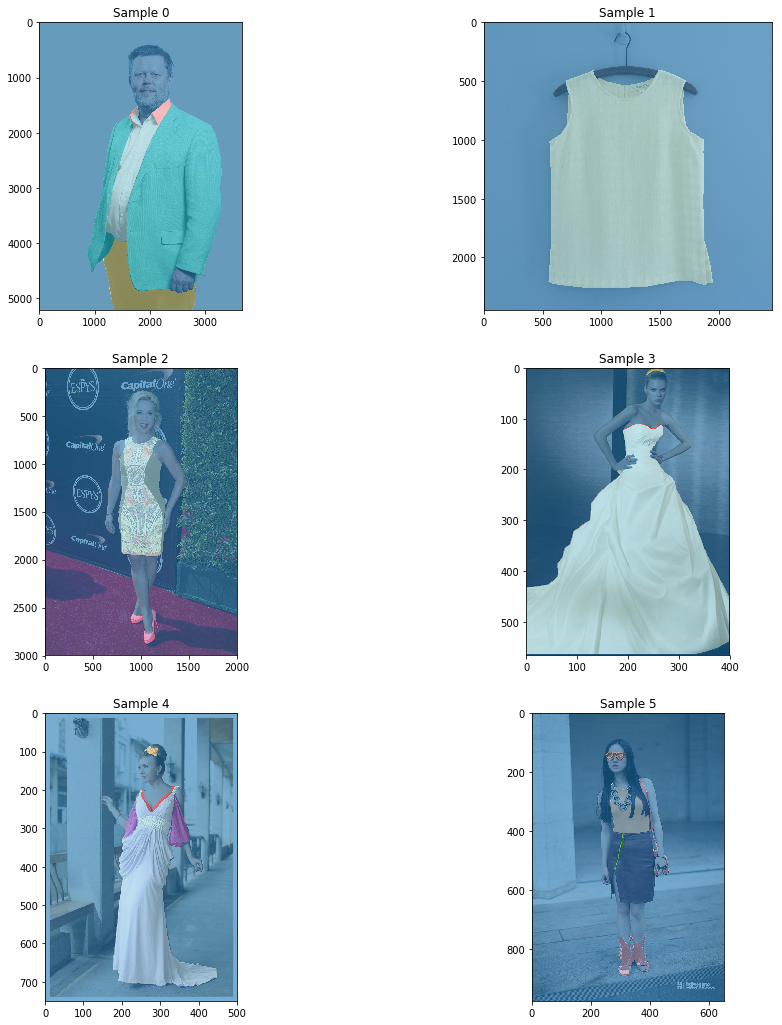

In [20]:
imgs, segs = imat.train_generator(dataset, 6)
fig, ax = plt.subplots(3, 2, figsize=(16, 18))
for i, (img, seg) in enumerate(zip(imgs,segs)):
    ax[i//2, i%2].imshow(cv2plt(img))
    seg[seg == 45] = 255
    ax[i//2, i%2].imshow(seg, cmap='tab20_r', alpha=0.6)
    ax[i//2, i%2].set_title("Sample {}".format(i))

Text(0.5,1,'b0f4d66b6570c1a3cdea3db998836201.jpg')

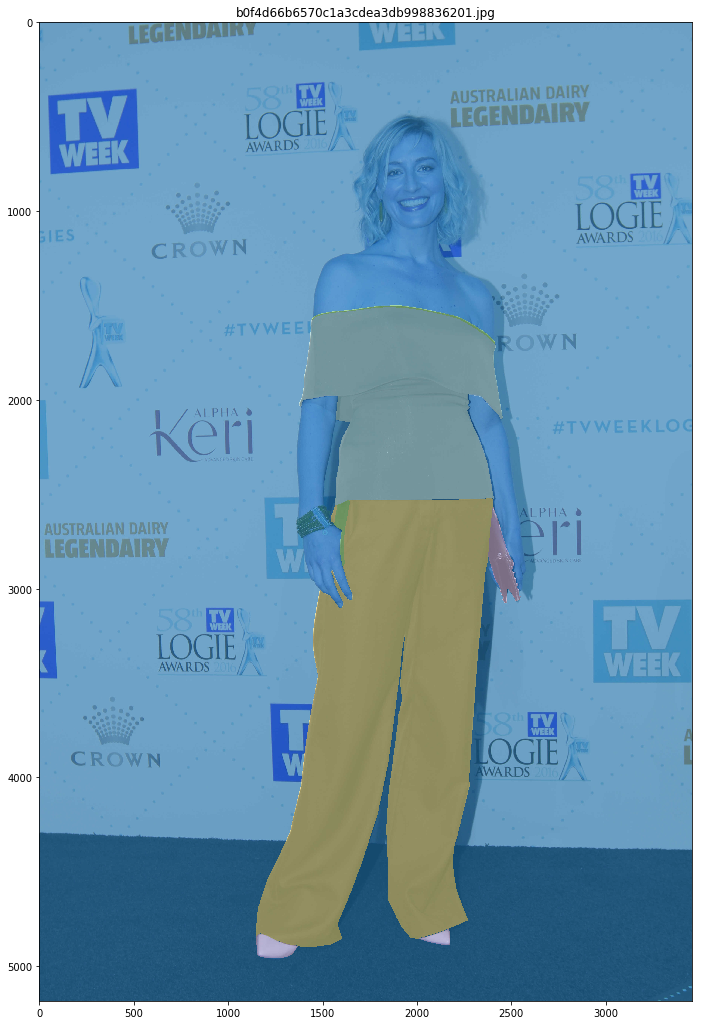

In [31]:
img_random = np.random.choice(df_traininfo.ImageId.unique())
# Display a random image with its mask
img, seg = dataset.get_image_with_mask(img_random)
fig, ax = plt.subplots(figsize=(16, 18))
ax.imshow(img)
seg[seg == 45] = 255
ax.imshow(seg, cmap='tab20_r', alpha=0.6)
ax.set_title("{}".format(img_random))

### Pixel Encodings for Masking